# Intrinsic parameter for a single camera
Output: intrinsic matrix K and distortion coefficients D

From the manufacturer's datasheet:
- focal lenghts fx, fy
- principal point (cx, cy)
- D = distortion coefficients (k1, k2, p1, p2, k3)

From this pipeline:
- K = intrinsic matrix 

In [15]:
import sys

if '/Users/damianstone/Documents/Code/tennis-project/post-triangulation/' not in sys.path:
  sys.path.append('/Users/damianstone/Documents/Code/tennis-project/post-triangulation/')

In [16]:

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import glob
import json

from utils.utils import print_image

  
BASE_PATH = '/Users/damianstone/Documents/Code/tennis-project/post-triangulation/'
IMG_BASE_PATH = f'{BASE_PATH}/images/gopros'

# two stereo pairs each side of the court
CAMERAS = ['CAM_1_LEFT', 'CAM_2_RIGHT', 'CAM_3_LEFT', 'CAM_4_RIGHT']

# output file name where we store the intrinsic parameters for each camera
OUT_PARAMS_FILE_NAME = f'{BASE_PATH}/data/intrinsic_params.json'


## Using manufacturer data

In [17]:
camera_data = {
    "CAM_1_LEFT": {
        "fx": 1800.0,
        "fy": 1805.0,
        "cx": 1920.0,
        "cy": 1080.0,
        "D": [-0.25, 0.05, 0.0, 0.0, -0.02],
    },
    "CAM_2_RIGHT": {
        "fx": 1795.0,
        "fy": 1800.0,
        "cx": 1918.0,
        "cy": 1078.0,
        "D": [-0.23, 0.04, 0.0, 0.0, -0.015],
    },
    "CAM_3_LEFT": {
        "fx": 1810.0,
        "fy": 1812.0,
        "cx": 1925.0,
        "cy": 1082.0,
        "D": [-0.27, 0.06, 0.0, 0.0, -0.018],
    },
    "CAM_4_RIGHT": {
        "fx": 1805.0,
        "fy": 1810.0,
        "cx": 1922.0,
        "cy": 1081.0,
        "D": [-0.24, 0.05, 0.0, 0.0, -0.017],
    }
}

In [18]:
# update each camera entry with the intrinsic matrix K
for cam, params in camera_data.items():
    fx, fy, cx, cy = params["fx"], params["fy"], params["cx"], params["cy"]
    K = [[fx, 0, cx], [0, fy, cy], [0, 0, 1]]
    params["K"] = K

with open(OUT_PARAMS_FILE_NAME, "w") as file:
    json.dump(camera_data, file, indent=4)

print(f"Updated JSON saved to {OUT_PARAMS_FILE_NAME}")

Updated JSON saved to /Users/damianstone/Documents/Code/tennis-project/post-triangulation//data/intrinsic_params.json


### Validation using manufacturer data
When using manufacturer-provided intrinsic parameters, is not possible to calculate reprojection error since that requires calibration data (chessboard corners). However, is still possible to validate the parameters by:
1. Visual inspection of undistortion
2. Testing with known straight lines in the scene
3. Comparing with manufacturer specifications


Validating image: Im_L_1.png

Visual Validation Checklist:
✓ Straight Line Test:
  - Tennis court lines should appear straight
  - Building edges should be straight
  - No curved distortions at image edges

✓ Field of View Check:
  - Image shouldn't be excessively cropped
  - No severe stretching at edges

✓ Distortion Pattern:
  - No obvious barrel or pincushion distortion
  - No unusual warping effects


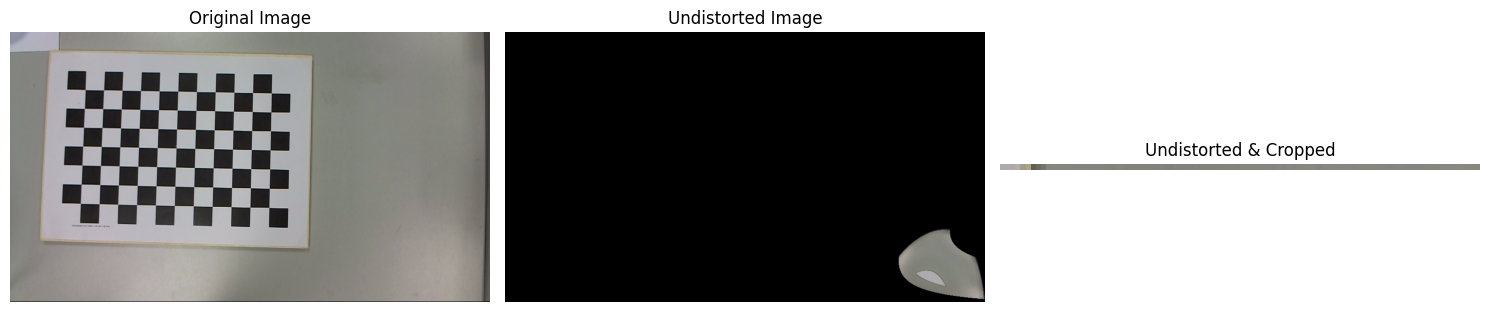


Validating image: Im_L_14.png

Visual Validation Checklist:
✓ Straight Line Test:
  - Tennis court lines should appear straight
  - Building edges should be straight
  - No curved distortions at image edges

✓ Field of View Check:
  - Image shouldn't be excessively cropped
  - No severe stretching at edges

✓ Distortion Pattern:
  - No obvious barrel or pincushion distortion
  - No unusual warping effects


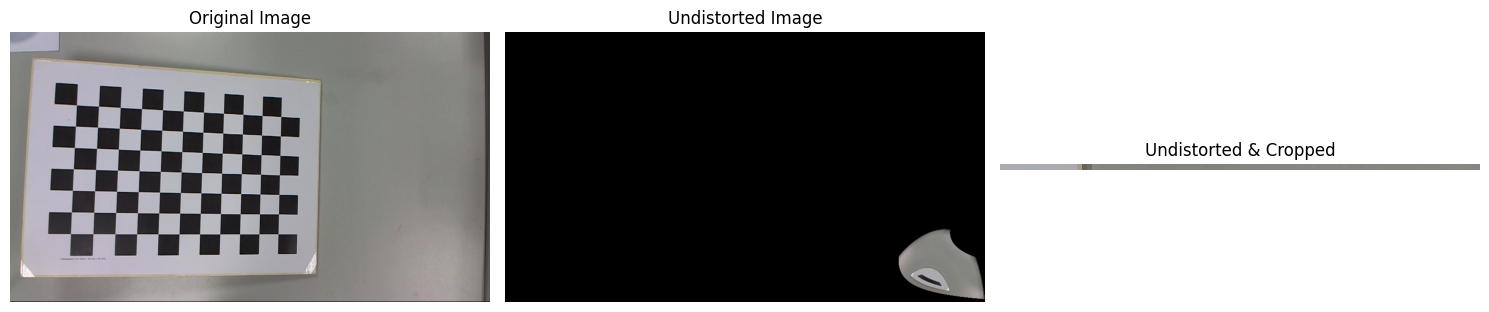


Validating image: Im_L_15.png

Visual Validation Checklist:
✓ Straight Line Test:
  - Tennis court lines should appear straight
  - Building edges should be straight
  - No curved distortions at image edges

✓ Field of View Check:
  - Image shouldn't be excessively cropped
  - No severe stretching at edges

✓ Distortion Pattern:
  - No obvious barrel or pincushion distortion
  - No unusual warping effects


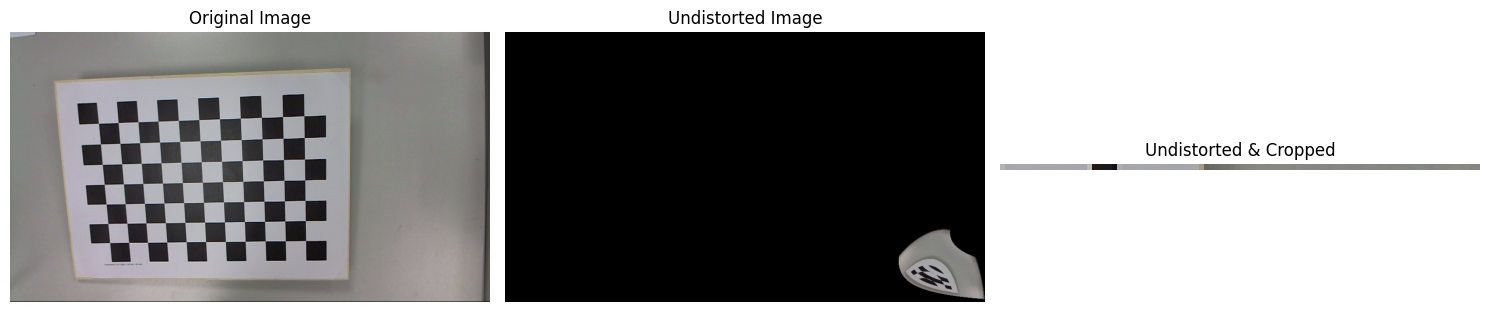

In [19]:
def validate_undistortion(img_path, camera_params):
    """Validate intrinsic parameters through visual comparison of distorted vs undistorted images"""
    K = np.array(camera_params['K'])
    D = np.array(camera_params['D'])
    
    img = cv.imread(img_path)
    height, width = img.shape[:2]
    
    # get optimal camera matrix for undistortion
    K_undistort, roi = cv.getOptimalNewCameraMatrix(
        K, D, (width, height), 1, (width, height)
    )
    
    # undistort the image
    undistorted = cv.undistort(img, K, D, None, K_undistort)
    
    # crop according to ROI
    x, y, w, h = roi
    undistorted_cropped = undistorted[y:y+h, x:x+w]
    
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.title('Original Image')
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(132)
    plt.title('Undistorted Image')
    plt.imshow(cv.cvtColor(undistorted, cv.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(133)
    plt.title('Undistorted & Cropped')
    plt.imshow(cv.cvtColor(undistorted_cropped, cv.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


IMAGES = glob.glob(f'{IMG_BASE_PATH}/{CAMERAS[0]}/*.png')
camera_name = CAMERAS[0]
test_images = IMAGES[:3]
for img_path in test_images:
    print(f"\nValidating image: {img_path.split('/')[-1]}")
    # Guidelines for visual inspection
    print("\nVisual Validation Checklist:")
    print("✓ Straight Line Test:")
    print("  - Tennis court lines should appear straight")
    print("  - Building edges should be straight")
    print("  - No curved distortions at image edges")
    
    print("\n✓ Field of View Check:")
    print("  - Image shouldn't be excessively cropped")
    print("  - No severe stretching at edges")
    
    print("\n✓ Distortion Pattern:")
    print("  - No obvious barrel or pincushion distortion")
    print("  - No unusual warping effects")
    validate_undistortion(img_path, camera_data[camera_name])

In [20]:
camera_data

{'CAM_1_LEFT': {'fx': 1800.0,
  'fy': 1805.0,
  'cx': 1920.0,
  'cy': 1080.0,
  'D': [-0.25, 0.05, 0.0, 0.0, -0.02],
  'K': [[1800.0, 0, 1920.0], [0, 1805.0, 1080.0], [0, 0, 1]]},
 'CAM_2_RIGHT': {'fx': 1795.0,
  'fy': 1800.0,
  'cx': 1918.0,
  'cy': 1078.0,
  'D': [-0.23, 0.04, 0.0, 0.0, -0.015],
  'K': [[1795.0, 0, 1918.0], [0, 1800.0, 1078.0], [0, 0, 1]]},
 'CAM_3_LEFT': {'fx': 1810.0,
  'fy': 1812.0,
  'cx': 1925.0,
  'cy': 1082.0,
  'D': [-0.27, 0.06, 0.0, 0.0, -0.018],
  'K': [[1810.0, 0, 1925.0], [0, 1812.0, 1082.0], [0, 0, 1]]},
 'CAM_4_RIGHT': {'fx': 1805.0,
  'fy': 1810.0,
  'cx': 1922.0,
  'cy': 1081.0,
  'D': [-0.24, 0.05, 0.0, 0.0, -0.017],
  'K': [[1805.0, 0, 1922.0], [0, 1810.0, 1081.0], [0, 0, 1]]}}

## Using a chessboard

LEFT


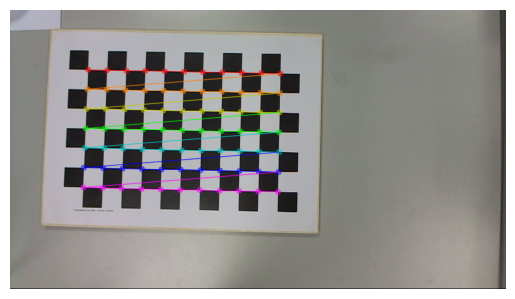

LEFT


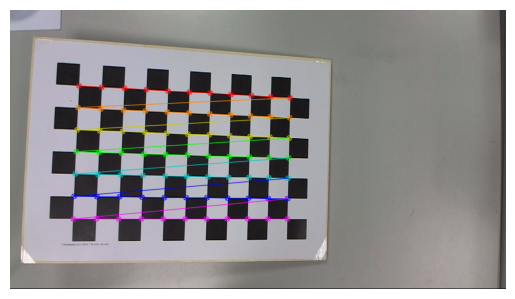

LEFT


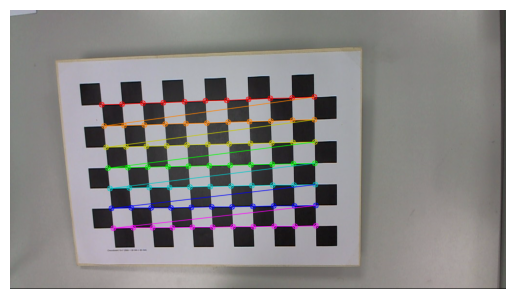

In [21]:
from utils.utils import get_frame_size

IMG_BASE_PATH = f'{BASE_PATH}/images/gopros'
CHESSBOARD_SIZE = (11, 7) # rows, columnss
SQUARE_SIZE_MM = 30 
FRAME_SIZE = get_frame_size(f'{IMG_BASE_PATH}/{CAMERAS[0]}/*.png')
IMAGES = glob.glob(f'{IMG_BASE_PATH}/{CAMERAS[0]}/*.png')

# how exact we want to be find the corners of each square in the chessboard 
# 30 = max number of iterations
# 0.001 = stop if the change in the corner position is less than 0.001 - convergence threshold 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# create 3D points of the chessboard corners
# each row represents a coordinate of a corner of the chessboard
# corner = interesection between two squares
objp = np.zeros(
  (CHESSBOARD_SIZE[0] * CHESSBOARD_SIZE[1], 3), 
  np.float32
)

# it generates a grid of (x, y) coordinates for chessboard corners and stores them as 3D points with z = 0 for calibration
# z = 0 because the chessboard is flat
objp[:,:2] = np.mgrid[
  0:CHESSBOARD_SIZE[0],
  0:CHESSBOARD_SIZE[1]
  ].T.reshape(-1,2)

objp = objp * SQUARE_SIZE_MM

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane

i = 0
for cam_img in IMAGES:
  img = cv.imread(cam_img)
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # find the chessboard corners
  ret, corners = cv.findChessboardCorners(gray, CHESSBOARD_SIZE, None)

  # if corners are found, add object points, image points (after refining them)
  if ret:
    # store the same object for each image
    objpoints.append(objp)

    # get all the coordinates of the corners
    corners = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    
    # append the corners to the imgpoints list
    imgpoints.append(corners)

    if i < 3:
      #draw and display the corners
      cv.drawChessboardCorners(img, CHESSBOARD_SIZE, corners, ret)
      print("LEFT")
      print_image(img)
      i += 1
    cv.waitKey(1000)

cv.destroyAllWindows()


# original intrinsic parameters
# ret = reprojection error
# K = intrinsic matrix
# D = distortion coefficients -> how much the lens bends the image (q tanto curva la imagen el lente)
# R = rotation vectors
# T = translation vectors
ret, K, D, R, T = cv.calibrateCamera(objpoints, imgpoints, FRAME_SIZE, None, None)
height, width, channels = img.shape

# new camera matrix for undistortion, useful to test the original intrinsic parameters
NEW_K, roi = cv.getOptimalNewCameraMatrix(
                              K, 
                              D, 
                              (width, height), 
                              1, 
                              (width, height)
                          )


# save the intrinsic parameters
camera_data[CAMERAS[0]]["D"] = D.tolist()
camera_data[CAMERAS[0]]["K"] = K.tolist()
camera_data[CAMERAS[0]]["K_undistorted"] = NEW_K.tolist()
# roi (Region of Interest) defines the valid pixel region after undistortion
# It returns (x, y, w, h) that can be used to crop the undistorted image
# This helps remove any black borders created during the undistortion process
camera_data[CAMERAS[0]]["ROI"] = roi



In [22]:
camera_data

{'CAM_1_LEFT': {'fx': 1800.0,
  'fy': 1805.0,
  'cx': 1920.0,
  'cy': 1080.0,
  'D': [[0.031065466847288115,
    -0.17971041918286587,
    0.0008742454765841088,
    0.00017705165552900554,
    0.2137290565159718]],
  'K': [[718.9178448678117, 0.0, 523.817940945866],
   [0.0, 729.9676398018895, 285.6759899313009],
   [0.0, 0.0, 1.0]],
  'K_undistorted': [[717.1041190793976, 0.0, 523.8087440893095],
   [0.0, 727.6917880416373, 286.17021970497035],
   [0.0, 0.0, 1.0]],
  'ROI': (4, 2, 1016, 570)},
 'CAM_2_RIGHT': {'fx': 1795.0,
  'fy': 1800.0,
  'cx': 1918.0,
  'cy': 1078.0,
  'D': [-0.23, 0.04, 0.0, 0.0, -0.015],
  'K': [[1795.0, 0, 1918.0], [0, 1800.0, 1078.0], [0, 0, 1]]},
 'CAM_3_LEFT': {'fx': 1810.0,
  'fy': 1812.0,
  'cx': 1925.0,
  'cy': 1082.0,
  'D': [-0.27, 0.06, 0.0, 0.0, -0.018],
  'K': [[1810.0, 0, 1925.0], [0, 1812.0, 1082.0], [0, 0, 1]]},
 'CAM_4_RIGHT': {'fx': 1805.0,
  'fy': 1810.0,
  'cx': 1922.0,
  'cy': 1081.0,
  'D': [-0.24, 0.05, 0.0, 0.0, -0.017],
  'K': [[1805.0, 

### Validation intrinsic chessboard pipeline


Validating image: Im_L_1.png


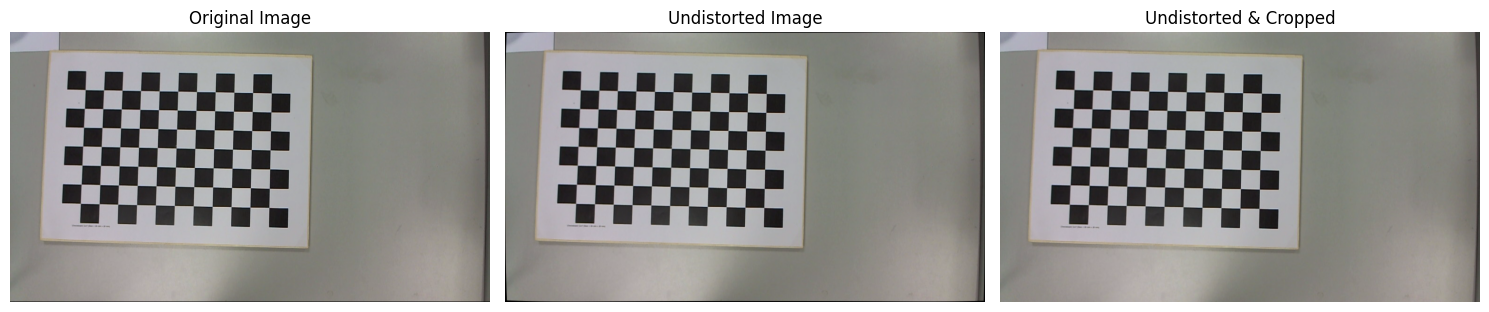


Total reprojection error: 0.0210 pixels
Note: Reprojection error < 1 pixel is considered good

Validating image: Im_L_14.png


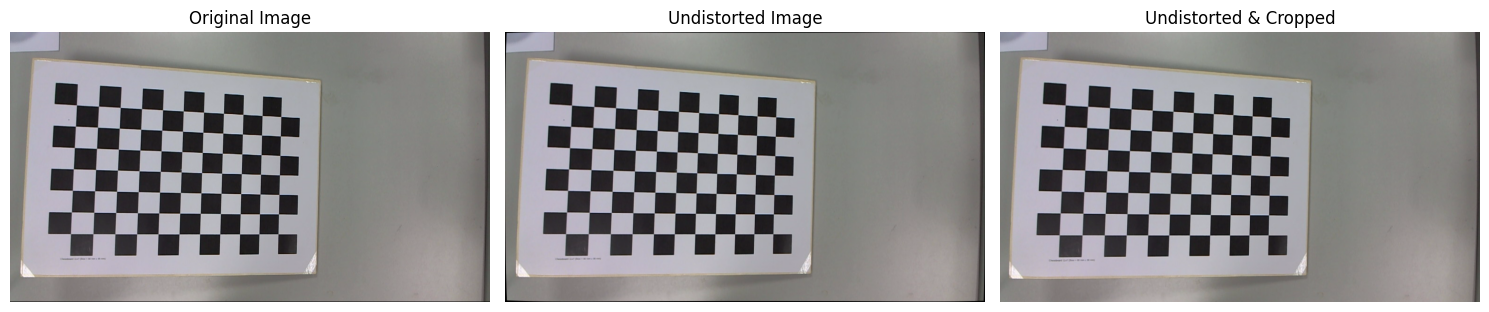


Total reprojection error: 0.0210 pixels
Note: Reprojection error < 1 pixel is considered good

Validating image: Im_L_15.png


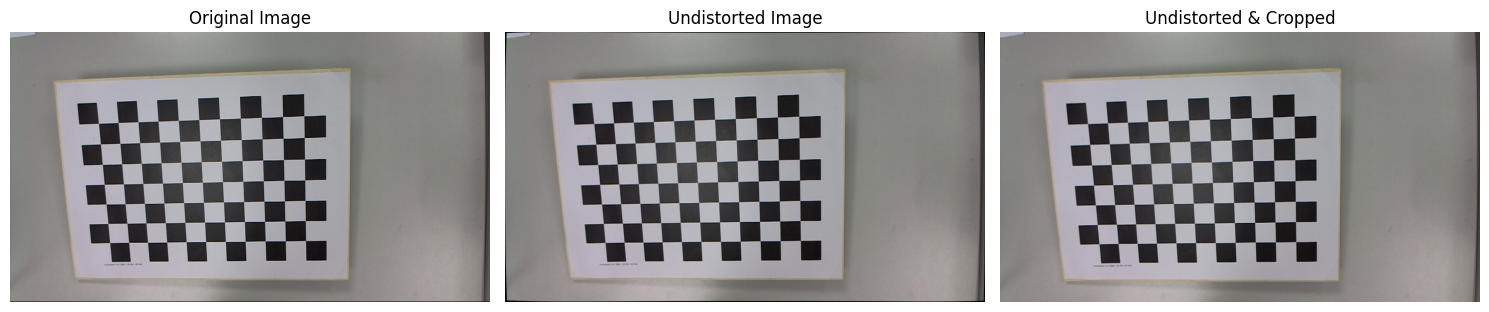


Total reprojection error: 0.0210 pixels
Note: Reprojection error < 1 pixel is considered good


In [23]:
def validate_intrinsic_params(img_path, K, D, NEW_K, roi):
    """Validate intrinsic parameters through:
    1. Visual comparison of distorted vs undistorted images
    2. Calculation of reprojection error
    """
    img = cv.imread(img_path)
    
    # undistort the image
    undistorted = cv.undistort(img, K, D, None, NEW_K)
    
    # crop the image according to ROI to remove black borders
    x, y, w, h = roi
    undistorted_cropped = undistorted[y:y+h, x:x+w]
    
    # display original vs undistorted
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.title('Original Image')
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(132)
    plt.title('Undistorted Image')
    plt.imshow(cv.cvtColor(undistorted, cv.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(133)
    plt.title('Undistorted & Cropped')
    plt.imshow(cv.cvtColor(undistorted_cropped, cv.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # calculate reprojection error
    mean_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv.projectPoints(objpoints[i], R[i], T[i], K, D)
        error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
        mean_error += error
    
    print(f"\nTotal reprojection error: {mean_error/len(objpoints):.4f} pixels")
    print("Note: Reprojection error < 1 pixel is considered good")

# validate using a few test images
test_images = IMAGES[:3]
for img_path in test_images:
    print(f"\nValidating image: {img_path.split('/')[-1]}")
    validate_intrinsic_params(img_path, K, D, NEW_K, roi)